In [1]:
#Machine Learning and Statistics - 2021 Project Submission

#GMIT Higher Diploma in Data Analytics

#Submitted by Fiona Lee - 19 December 2021

##About the Abalone Dataset##

Name - Description

Sex -  M, F, and I (male, female, infant)
Length - Longest shell measurement (mm)
Diameter - Perpendicular to length (mm)
Height - Height with meat in shell (mm)
Whole weight - Whole abalone (grams)
Shucked weight - Weight of meat (grams)
Viscera weight - gut weight after bleeding (grams)
Shell weight - after being dried (grams)
Rings - age in years

In [2]:
# Import Modules

import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Set default seaborn style
sns.set

# Open a new file called crop.dataset.csv to redirect output of analysis.py
# Ref Source: https://stackoverflow.com/questions/7152762/how-to-redirect-print-output-to-a-file-using-python
# import sys
# sys.stdout=open("abalone.csv","w")

pd.set_option("display.precision", 2)
abalone = pd.read_csv("abalone.csv" , names = None , index_col = None)
abalone_df = pd.DataFrame(abalone)
abalone_df.columns=['Sex','Length', 'Diameter', 'Height','Whole_Weight', 'Schucked_Weight', 'Viscera_Weight', 'Shell_Weight','Rings']
abalone_df = abalone_df.replace('I','Infant')
abalone_df = abalone_df.replace('M','Male')
abalone_df = abalone_df.replace('F','Female')
pd.set_option("display.max_rows", None)#Show the entire dataset
pd.set_option('expand_frame_repr', False) #print dataframe on a single line

### Check if there are any empty cells in the dataset ###

In [4]:
#pd.set_option("display.max_rows",500)# Option to display all entries
abalone_df.style.highlight_null(null_color='red'); #highlight any null values in red

#Option to print the dataset with True/False Values
print(abalone_df.isnull())  

#Alternative method (https://stackoverflow.com/questions/30447083/python-pandas-return-only-those-rows-which-have-missing-values)
#abalone_df[pd.isnull(abalone_df).any(axis=1)]

#*Note not printed due to the size of the dataset.  No null values noted*

        Sex  Length  Diameter  Height  Whole_Weight  Schucked_Weight  Viscera_Weight  Shell_Weight  Rings
0     False   False     False   False         False            False           False         False  False
1     False   False     False   False         False            False           False         False  False
2     False   False     False   False         False            False           False         False  False
3     False   False     False   False         False            False           False         False  False
4     False   False     False   False         False            False           False         False  False
5     False   False     False   False         False            False           False         False  False
6     False   False     False   False         False            False           False         False  False
7     False   False     False   False         False            False           False         False  False
8     False   False     False   False         

In [5]:
print ("ABALONE DATA SET SUMMARY".center (70))
print ("")
print ("Table 1 -  First 10 Results")
print ("")
print (abalone_df.head(10))

                       ABALONE DATA SET SUMMARY                       

Table 1 -  First 10 Results

      Sex  Length  Diameter  Height  Whole_Weight  Schucked_Weight  Viscera_Weight  Shell_Weight  Rings
0    Male    0.35      0.27    0.09          0.23             0.10            0.05          0.07      7
1  Female    0.53      0.42    0.14          0.68             0.26            0.14          0.21      9
2    Male    0.44      0.36    0.12          0.52             0.22            0.11          0.15     10
3  Infant    0.33      0.26    0.08          0.20             0.09            0.04          0.06      7
4  Infant    0.42      0.30    0.10          0.35             0.14            0.08          0.12      8
5  Female    0.53      0.41    0.15          0.78             0.24            0.14          0.33     20
6  Female    0.55      0.42    0.12          0.77             0.29            0.15          0.26     16
7    Male    0.47      0.37    0.12          0.51             0.22 

In [6]:
print ("Table 2 -  Number of Samples of each Class")
print ("")
print(abalone_df.value_counts('Sex').sort_index())

Table 2 -  Number of Samples of each Class

Sex
Female    1307
Infant    1342
Male      1527
dtype: int64


In [7]:
print ("Table 3 -  Number of Columns and Number of Rows")
print ("")
print (abalone_df.shape)

Table 3 -  Number of Columns and Number of Rows

(4176, 9)


In [8]:
print ("Table 4 -  General Information about the Abalone Data Set")
print ("")
#pd.set_option("display.expand_frame_repr", True)
print(abalone_df.describe())

Table 4 -  General Information about the Abalone Data Set

        Length  Diameter   Height  Whole_Weight  Schucked_Weight  Viscera_Weight  Shell_Weight    Rings
count  4176.00   4176.00  4176.00      4.18e+03         4.18e+03        4.18e+03      4.18e+03  4176.00
mean      0.52      0.41     0.14      8.29e-01         3.59e-01        1.81e-01      2.39e-01     9.93
std       0.12      0.10     0.04      4.90e-01         2.22e-01        1.10e-01      1.39e-01     3.22
min       0.07      0.06     0.00      2.00e-03         1.00e-03        5.00e-04      1.50e-03     1.00
25%       0.45      0.35     0.12      4.42e-01         1.86e-01        9.34e-02      1.30e-01     8.00
50%       0.55      0.42     0.14      8.00e-01         3.36e-01        1.71e-01      2.34e-01     9.00
75%       0.61      0.48     0.17      1.15e+00         5.02e-01        2.53e-01      3.29e-01    11.00
max       0.81      0.65     1.13      2.83e+00         1.49e+00        7.60e-01      1.00e+00    29.00


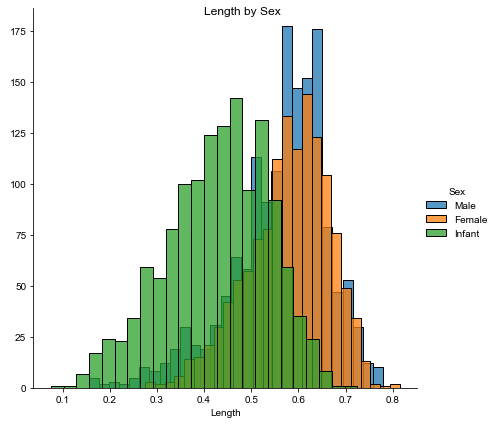

In [9]:
#MULTI DIMENSIONAL HISTOGRAMS (By Feature & Sex)

Length = sns.FacetGrid (abalone_df, height = 6, hue = "Sex").map(sns.histplot,"Length").add_legend().fig.suptitle('Length by Sex') 
sns.set_style ("whitegrid")
sns.set_style ("ticks")
a4_dims = (11.7, 8.27)
fig , Sepal_Length = sns.figsize = a4_dims
plt.show()


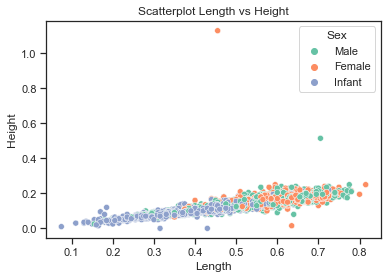

In [10]:
# SCATTER PLOTS:
# Ref Source: Scatterplot Tutorial - https://seaborn.pydata.org/generated/seaborn.scatterplot.html
# SCATTERPLOT BY SEX - WITHOUT REGRESSION LINES
sns.set (style = "whitegrid", palette ='Set2')
sns.set_style ("ticks")
#plotcolor = ['red','blue','yellow']
ax = sns.scatterplot (x = "Length", y ="Height", hue = "Sex", data = abalone_df)
ax.set_title ("Scatterplot Length vs Height")
a4_dims = (11.7, 8.27)
fig, ax = sns.figsize = a4_dims
plt.show()


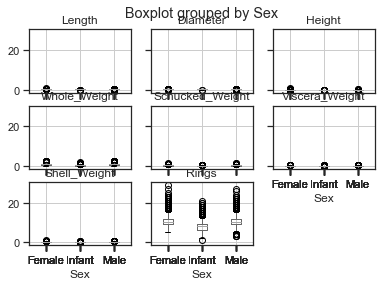

In [32]:
# BOX PLOT:
#fig = plt.figure(figsize =(10, 7)) 
#colors = ['#0000FF', '#00FF00',  '#FFFF00', '#FF00FF'] 
boxplot = abalone_df.boxplot(column=['Length','Diameter','Height','Whole_Weight','Schucked_Weight','Viscera_Weight','Shell_Weight','Rings'],by="Sex" ,return_type='axes')
plt.show()
#boxplot1 = abalone_df.boxplot(column=['Length','Diameter','Height'],by="Sex" ,return_type='axes')
#plt.show()
#boxplot2 = abalone_df.boxplot(column=['Whole_Weight','Schucked_Weight','Viscera_Weight','Shell_Weight'],by = "Sex" ,return_type='axes')
#plt.show()
#boxplot3 = abalone_df.boxplot(column=['Rings'],by = "Sex" ,return_type='axes')
#plt.show()


In [39]:
sns.boxplot(data=(pd.melt(abalone_df)))
plt.show()

ValueError: min() arg is an empty sequence

In [ ]:
# SCATTERPLOT GRID COMPARING ALL VARIABLES
#sns.set_style ("whitegrid")
#sns.set_style ("ticks")
ax = sns.pairplot (abalone_df, hue="Sex", height=2);
plt.title('title', loc ='left')
plt.subplots_adjust(top=0.9)
#plotcolor = ['red','blue','yellow']
ax.fig.suptitle ("Scatterplot Grid - Compare All Variables by Sex", fontsize = 13)
# Scale to print on A4 sheet
a4_dims = (11.7, 8.27)
fig, ax = sns.figsize = a4_dims
plt.show()

In [ ]:
# Use 3 decimal places in output display
pd.set_option("display.precision", 2)

# Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", True)

# Set max rows displayed in output to 25
#pd.set_option("display.max_rows", 25)

print ("Table 5 -  Mean, Median, Standard Deviation, Min and Max Values")
print ("")
print ("Length - mm")
print (abalone_df.groupby(['Sex']).agg(['mean', 'median' , 'std', 'min', 'max']).Length)
print ("")
print ("Diameter - mm")
print (abalone_df.groupby(['Sex']).agg(['mean', 'median' , 'std', 'min', 'max']).Diameter)
print ("")
print ("Height - mm")
print (abalone_df.groupby(['Sex']).agg(['mean', 'median' , 'std', 'min', 'max']).Height)
print ("")
pd.set_option("display.precision", 3)
print ("Whole Weight - grams")
print (abalone_df.groupby(['Sex']).agg(['mean', 'median' , 'std', 'min', 'max']).Whole_Weight)
print ("")
print ("Schucked Weight - grams")
print (abalone_df.groupby(['Sex']).agg(['mean', 'median' , 'std', 'min', 'max']).Schucked_Weight)
print ("")
pd.set_option("display.precision", 4)
print ("Visceral Weight - grams")
print (abalone_df.groupby(['Sex']).agg(['mean', 'median' , 'std', 'min', 'max']).Viscera_Weight)
print ("")
pd.set_option("display.precision", 3)
print ("Shell Weight - grams")
print (abalone_df.groupby(['Sex']).agg(['mean', 'median' , 'std', 'min', 'max']).Shell_Weight)
print ("")
pd.set_option("display.precision", 2)
print ("Age - Number of Rings")
print (abalone_df.groupby(['Sex']).agg(['mean', 'median' , 'std', 'min', 'max']).Rings)


In [ ]:
print ("Table 6  - List of Columns and Their Data Type")
print ("")
print (abalone_df.info())
print ("")